### 1) importing libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 2) Reading and removing missing values:

In [3]:
Auto = pd.read_csv('Auto.csv')

In [4]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
Auto['horsepower'].loc[~Auto['horsepower'].str.isnumeric()]

32     ?
126    ?
330    ?
336    ?
354    ?
Name: horsepower, dtype: object

#### The null values in this dataset are set to '?' , so we can read the data again with specifying na_values

In [6]:
Auto_new = pd.read_csv('Auto.csv',na_values=['?'])
Auto_new.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [7]:
Auto_new.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
Auto_new.dropna(inplace=True)
Auto_new = Auto_new.reset_index(drop=True)
Auto_new.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### 3) Analysis of the data and plotting:

#### a) only name is qualitative, all other predictors are quantitative.

In [9]:
summary = Auto_new.describe()
desired_statistics = summary.loc[['min', 'max', 'mean', 'std']]
desired_statistics

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518


In [10]:
Auto_new.index

RangeIndex(start=0, stop=392, step=1)

In [11]:
Auto_new_2 = Auto_new.drop(index=range(10,86))

In [12]:
summary2 = Auto_new_2.describe()
desired_statistics2 = summary2.loc[['min', 'max', 'mean', 'std']]
desired_statistics2

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910


In [13]:
Auto_new_2['origin_name'] = Auto_new_2['origin'].map({1: 'American', 2: 'European', 3: 'Asian'})
def categorize_year(year):
    if year % 2 == 0:
        if year != 82:
            return str(year) + '-' + str(year + 1)
        else:
            return str(year)
    else:
        return str(year - 1) + '-' + str(year)
    
Auto_new_2['year_group'] = Auto_new_2['year'].apply(categorize_year)

Text(0, 0.5, 'mpg')

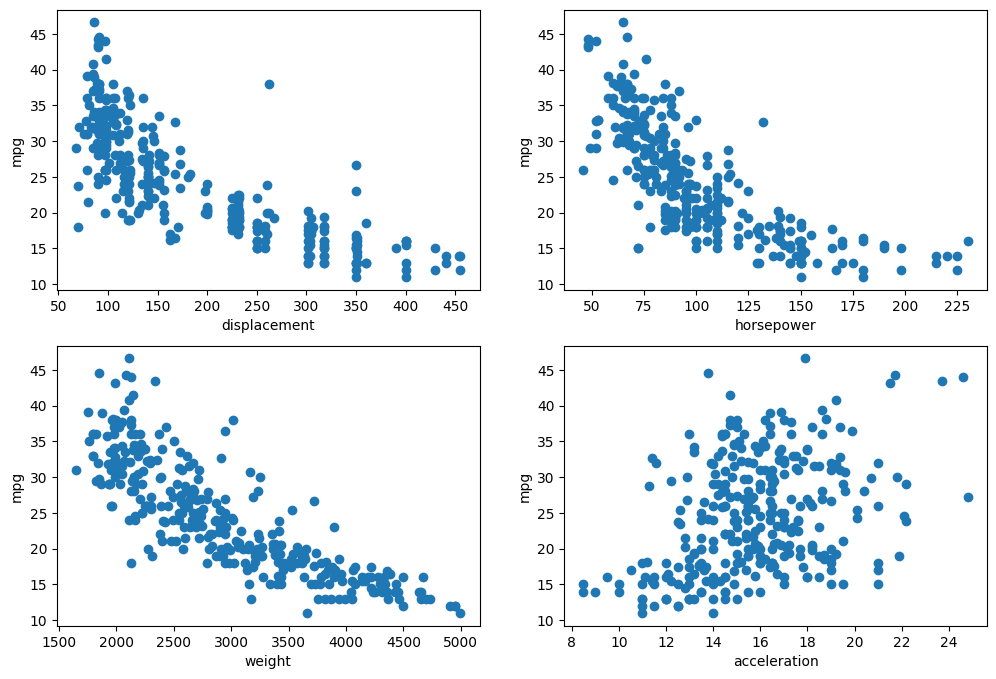

In [14]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax[0][0].scatter(Auto_new_2['displacement'], Auto_new_2['mpg'])
ax[0][1].scatter(Auto_new_2['horsepower'], Auto_new_2['mpg'])
ax[1][0].scatter(Auto_new_2['weight'], Auto_new_2['mpg'])
ax[1][1].scatter(Auto_new_2['acceleration'], Auto_new_2['mpg'])

ax[0][0].set_xlabel('displacement')
ax[0][0].set_ylabel('mpg')
ax[0][1].set_xlabel('horsepower')
ax[0][1].set_ylabel('mpg')
ax[1][0].set_xlabel('weight')
ax[1][0].set_ylabel('mpg')
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('mpg')

#### 1-Displacement vs. MPG:
##### As engine displacement increases, fuel efficiency decreases. This negative correlation suggests that vehicles with larger engines tend to consume more fuel per mile traveled, resulting in lower miles per gallon (mpg).
#### 2-Weight vs. MPG:
##### Higher vehicle weight is associated with lower fuel efficiency, as heavier vehicles require more energy to accelerate and maintain speed. This negative correlation highlights the impact of vehicle weight on fuel consumption and miles per gallon (mpg).
#### 3-Horsepower vs. MPG:
##### Greater engine horsepower is typically accompanied by lower fuel efficiency, leading to a negative correlation between horsepower and miles per gallon (mpg). Vehicles with higher horsepower engines tend to consume more fuel to produce increased power, resulting in reduced fuel economy.
#### 5-Acceleration vs. MPG:
#####  Acceleration exhibits a positive correlation with fuel efficiency, indicating that gentler acceleration patterns are associated with higher miles per gallon (mpg). This relationship suggests that smoother acceleration practices contribute to improved fuel economy and overall efficiency.

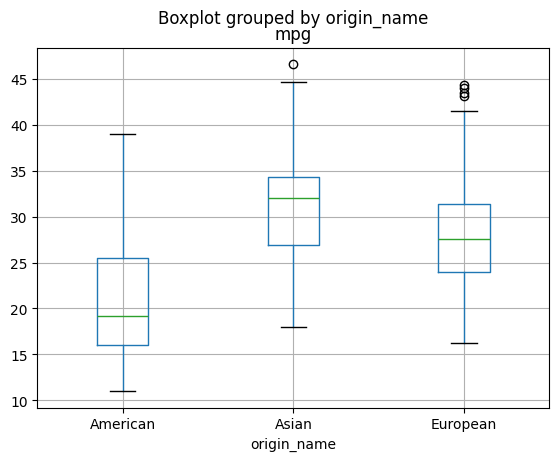

In [15]:
Auto_new_2.boxplot(column='mpg',by='origin_name');

##### After analyzing the boxplot comparing mpg by origin, we can see that vehicles originating from American manufacturers exhibit lower mpg values compared to both European and Asian counterparts. The European vehicles show slightly lower mpg values than Asian vehicles which has the highest mpg values. This suggests that, on average, vehicles from American manufacturers tend to have lower fuel efficiency compared to vehicles from European and Asian manufacturers.

<BarContainer object of 7 artists>

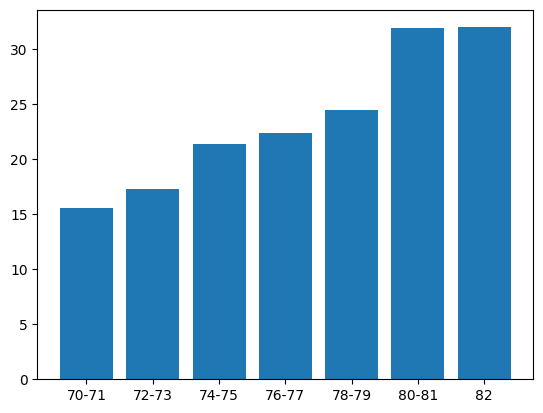

In [25]:
avg_mpg_by_year_group = Auto_new_2.groupby('year_group')['mpg'].mean()
plt.bar(avg_mpg_by_year_group.index,avg_mpg_by_year_group.values);

##### As the manufacturing year increases, there is a noticeable trend of rising average miles per gallon (mpg) values. This suggests an improvement in fuel efficiency over time, reflecting advancements in automotive technology and the implementation of stricter fuel efficiency standards in the industry."